In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [24]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 448 kB 51.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 키워드 추출

텍스트 데이터 전처리

In [13]:
df = pd.read_csv('/content/book_data_analysis.csv', encoding='cp949')
df.head()

,id,title,intro,content
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,NaN
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,\n\n2부 저물지 않는 시간 (1939년~1954년)\r깰 수 없는 꿈\r샌프란시...
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,"\n\n머리말 \r ｜제1부｜ 인간행동과 사회환경의 개요 \r 제1장 인간행동, ..."
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,\n\n저자의 말 \r 제1부 평화사상 제 1 장 그리스도교의 평화사상 \r제 2...
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",\n\n01기록체계: 정보 저장의 네트워크\r02문자 독점 시대\r03축음기와 실재...


In [14]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [22]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,content,ko_text
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,NaN,달러구트 꿈 백화점 세트전권
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,\n\n2부 저물지 않는 시간 (1939년~1954년)\r깰 수 없는 꿈\r샌프란시...,거기 내가 가면 안 돼요
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,"\n\n머리말 \r ｜제1부｜ 인간행동과 사회환경의 개요 \r 제1장 인간행동, ...",인간행동과 사회환경
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,\n\n저자의 말 \r 제1부 평화사상 제 1 장 그리스도교의 평화사상 \r제 2...,평화사상과 통일의 길
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",\n\n01기록체계: 정보 저장의 네트워크\r02문자 독점 시대\r03축음기와 실재...,프리드리히키틀러큰글씨책이론총서


In [26]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [27]:
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(11711, 6)


,id,title,intro,content,ko_text,nouns
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,NaN,달러구트 꿈 백화점 세트전권,"[달러, 구트, 백화점, 세트, 전권]"
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,\n\n2부 저물지 않는 시간 (1939년~1954년)\r깰 수 없는 꿈\r샌프란시...,거기 내가 가면 안 돼요,"[거기, 가면]"
2,11931111_9788963527192,인간행동과 사회환경,▶ 이 책은 인간행동과 사회환경을 다룬 이론서입니다. 인간행동과 사회환경의 기초적이...,"\n\n머리말 \r ｜제1부｜ 인간행동과 사회환경의 개요 \r 제1장 인간행동, ...",인간행동과 사회환경,"[인간, 행동, 사회, 환경]"
3,12518812_9788962571431,평화사상과 통일의 길,『평화사상과 통일의 길』은 평화사상을 바탕으로 한반도가 왜 통일되어야 하는가를 설명...,\n\n저자의 말 \r 제1부 평화사상 제 1 장 그리스도교의 평화사상 \r제 2...,평화사상과 통일의 길,"[평화, 사상, 통일]"
4,14450596_9791128812774,프리드리히키틀러큰글씨책이론총서,"『프리드리히 키틀러(큰글씨책)』 은 〈기록체계: 정보 저장의 네트워크〉, 〈문자 독...",\n\n01기록체계: 정보 저장의 네트워크\r02문자 독점 시대\r03축음기와 실재...,프리드리히키틀러큰글씨책이론총서,"[프리드리히, 키틀러, 글씨, 이론, 총서]"


# 연관 분석을 이용한 키워드 분석

연관 키워드 추출

In [29]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6ecec4bbfa6b01841813e9f807ad15e9f9311faee50ce97f4f40e3a6a46de27c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [30]:
from apyori import apriori

In [31]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['달러', '구트', '백화점', '세트', '전권'], ['거기', '가면'], ['인간', '행동', '사회', '환경'], ['평화', '사상', '통일'], ['프리드리히', '키틀러', '글씨', '이론', '총서'], ['꾸뻬', '행복', '여행'], ['대지', '부작', '세트'], ['해병대', '전우', '년사', '세트'], ['결코'], ['배옥병', '세상', '밥상', '국민', '건강', '농촌', '희망', '지구', '행복'], ['소설', '녹정기', '세트', '최종', '한정판', '전권'], ['영혼', '단계', '치유'], ['회복', '지학', '입문', '양장본'], ['로스쿨', '민사법', '기록', '개정판', '개정판'], ['장벽', '시대', '초연', '결의', '시대', '장벽', '세상'], ['민법총칙', '제판'], ['개인', '편도', '자리'], ['타겟', '티드', '조종'], ['편집자'], ['법학', '개론'], ['선거', '부탁', '만화', '국회의원', '선거'], ['인생', '관문', '아이비리그', '입시', '전쟁', '미국사', '회의', '교육', '불평등'], ['자본', '이데올로기'], ['의사소통', '능력', '산업', '인재', '양성'], ['위안부', '문제', '일본'], ['행정', '법전'], ['레닌', '전집', '양장본', '현재', '혁명', '프롤레타리아트', '임무'], ['청년', '문재인'], ['한국', '선거', '예측', '가정당', '체계', '변호', '선거', '예측', '모형'], ['한국', '미디어', '거버넌스'], ['베이비부머', '산다', '청년', '지방', '귀향', '프로젝트'], ['정치', '코기토', '총서', '양장본'], ['밀리터리', '리뷰', '이지'], ['밀리터리', '리뷰', '쇼트'], ['역사'], ['심리학', '제판'], ['유한', '계급', '문고판'], ['나라', 

In [32]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=2,
                       max_length=2))
print(results[:10])

[]


In [33]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support


# 단어 빈도 추출하기

말뭉치 추출

In [34]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

달러구트 꿈 백화점  세트전권거기 내가 가면 안 돼요인간행동과 사회환경평화사상과 통일의 길프리드리히키틀러큰글씨책이론총서꾸뻬 씨의 행복 여행 부서진 대지 부작 세트해병대전우 년사 권 세트결코 늦지 않았다배옥병의 세상을 바꾸는 행복한 밥상국민의 건강 농촌의 희망 지구의 행복을 향해 걸어갑니다소설 녹정기 세트최종 한정판전권영혼을 위한 단계 치유의힘사회복지학 입문양장본 로스쿨 민사법 기록형개정판개정판장벽의 시대초연결의 시대 장벽이 세상을 바꾸고 있다민법총칙제판단단한 개인누구의 편도 아닌 자리에서타겟티드당신이 누른 좋아요는 어떻게 당신을 조종하는가편집자의 일법학개론선거를 부탁해만화와 함께 보는  국회의원 선거인생의 특별한 관문아이비리그의 치열한 입시 전쟁과 미국사회의 교육 불평등자본과 이데올로기  의사소통능력차산업 인재양성을 위한위안부 문제를 아이들에게 어떻게 가르칠까일본 편행정법전월 테제레닌 전집 양장본 현재의 혁명에서 프롤레타리아트의 임무청년 문재인한국 선거 예측가능한가정당 체계의 변호와 선거예측모형한국의 미디어 거버넌스베이비부머가 떠나야 모두가 산다청년과 지방을 살리는 귀향 프로젝트정치론코기토총서 양장본  밀리터리 리뷰 이지 밀리터리 리뷰 쇼트 역사의 오른편 옳은편법심리학판제판유한계급론문고판     나쁜 나라가 아니라 아픈 나라였다일본을 꿰뚫는 가지 키워드당 만드는 여자들오늘의 법정을 열겠습니다시민력을 키우는 허승 판사의 법 이야기 세상 이야기   판 통합 특허법판제판외국인 고용과 비자 실무가이드알기쉬운증보판 판제개정판민사소송법 강의코로나 자본주의의 모순이 낳은 재난반려견 법률상식제판조선독립운동사 연대표이행지체와 계약해제도시인류학우리가 사는 세상을 해석하는 방법강해 계약법 로스쿨실무 행정법 노트로스쿨개벽의 징후 개벽의 눈으로 대전환의 논점을 읽는다영국의 지역 정책미국 이민의 역사 이론과실제공원 관리학가족관계등록부 정정 판례 기반 국가와 국가안보바다와 영토분쟁바다인문학연구총서 양장본 왜냐하면 그러하니까대한민국을 지키려다 파면당한 공무원시민교육의 기초로서의 헌법시민교

In [35]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'장편소설': 1431, '판타지': 739, '소설': 581, '현대': 415, '양장본': 316, '이야기': 314, '사회': 291, '교육': 291, '한국': 263, '시대': 244, '세계': 238, '개정판': 231, '연구': 230, '제판': 221, '우리': 210, '신무협': 184, '수업': 182, '사람': 179, '이해': 174, '총서': 172, '실무': 165, '이론': 157, '시행': 153, '문화': 151, '역사': 144, '퓨전': 143, '글씨': 140, '정치': 140, '판례': 139, '자책': 137, '사례': 135, '미래': 134, '학교': 132, '심리학': 129, '세트': 127, '인간': 126, '법령': 123, '게임': 122, '완결': 122, '사랑': 121, '문학': 120, '마음': 118, '세상': 116, '대한민국': 116, '인문학': 113, '회복': 112, '전권': 109, '중국': 109, '문제': 108, '교사': 107, '중심': 105, '가지': 100, '철학': 99, '생각': 97, '개정': 93, '다시': 93, '유아': 90, '코로나': 89, '방법': 89, '글쓰기': 88, '정책': 85, '상담': 85, '장편': 85, '시리즈': 83, '회귀': 83, '인생': 82, '강의': 82, '고전': 82, '실제': 81, '당신': 80, '미국': 80, '청소년': 80, '규칙': 78, '일본': 77, '대한': 75, '관계': 74, '정의': 74, '대하': 74, '개론': 73, '생활': 73, '국제': 73, '주의': 72, '작가': 72, '국가': 71, '모든': 71, '지식': 70, '세계문학': 70, '심리': 69, '아이': 68, '복지': 68, '전략': 68, '여성': 67, '

단어 빈도 점수 추가

In [36]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 2] # 시각화의 편의를 위해 ‘nodesize’ 2 미만은 제거합니다.
node_df

,node,nodesize
0,달러,2
1,구트,2
2,백화점,3
3,세트,127
4,전권,109
...,...,...
10074,운기,3
10088,글말,2
10099,인민공화국,2
10127,명연,2


# 연관 키워드 네트워크 시각화

In [38]:
from matplotlib import font_manager, rc
font_path = "/content/IBMPlexSansKR-Bold.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

findfont: Font family ['IBM Plex Sans KR'] not found. Falling back to DejaVu Sans.


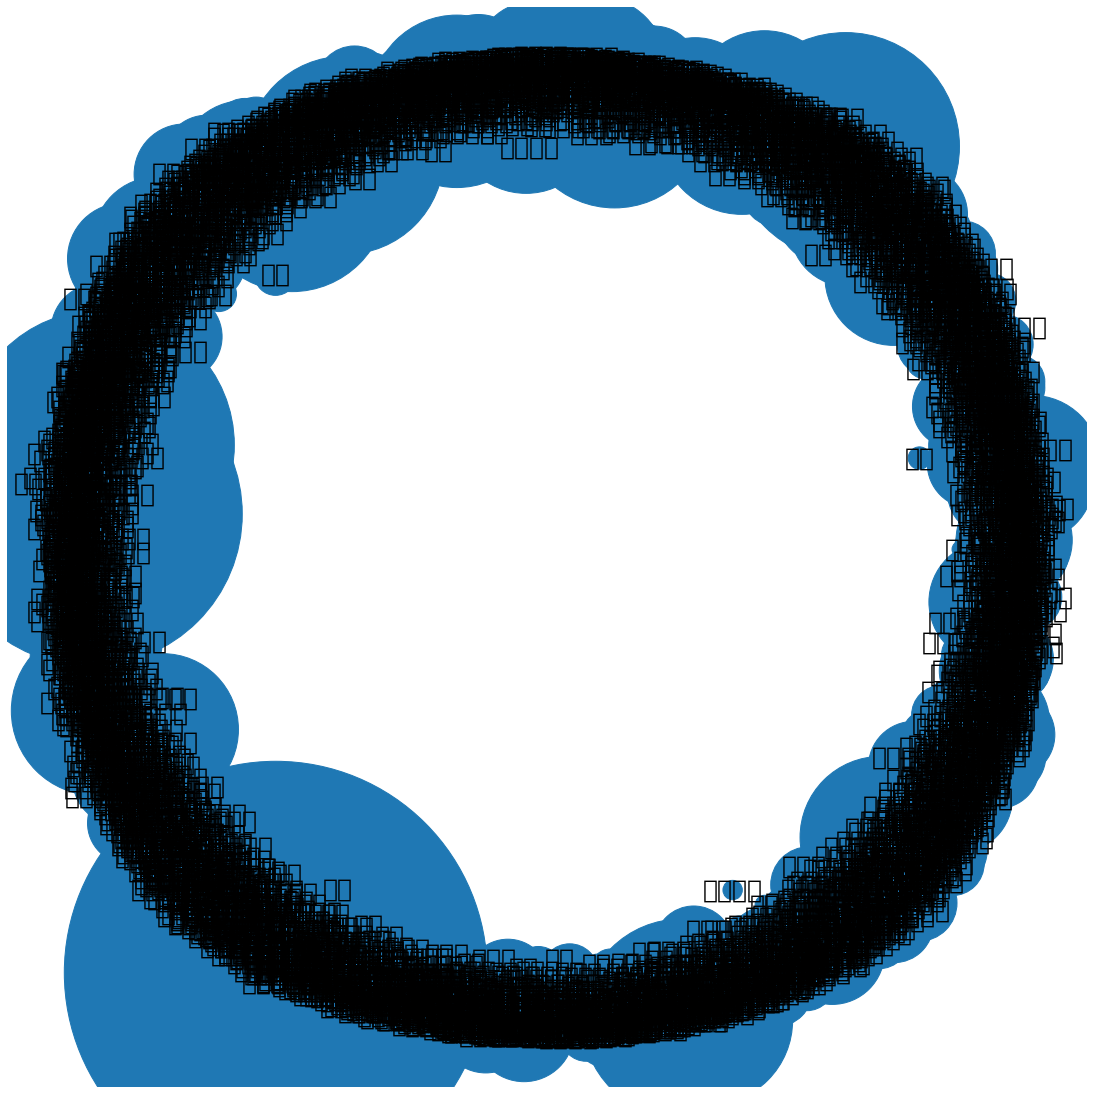

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize']*5)
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()